In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import os
import corner

In [9]:
def corner_data(file_folder, filename, tp=True):
    file_folder = os.path.expanduser(file_folder)

    datafile = os.path.join(file_folder, filename)

    print(datafile)

    with fits.open(datafile) as hdu:
        hdu.info()

    data_tp_file, header_tp_file = fits.getdata(datafile, header=True)
    print(data_tp_file.dtype)
    if tp:

        #teff, logg
        data_tp = np.vstack([data_tp_file['vrad'], data_tp_file['Teff'], data_tp_file['log(g)']]).T
        figure = corner.corner(
                            data_tp,
                            labels = [
                                    r"Radial Velocity",
                                    r"Temp",
                                    r"log(gravity)"
                                    ],
                            quantiles=[0.16,0.5,0.84],
                            show_titles=True,
                            title_kwargs={"fontsize": 12},
                        )
    # else:
    #     data_tp = np.vstack([data_tp_file['vrad_1'], data_tp_file['Teff'], data_tp_file['log(g)']]).T
    #     figure = corner.corner(
    #                     data_tp,
    #                     labels = [
    #                             r"Radial Velocity",
    #                             r"Temperature",
    #                             r"log(gravity)"
    #                             ],
    #                     quantiles=[0.16,0.5,0.84],
    #                     show_titles=True,
    #                     title_kwargs={"fontsize": 12},
    #                 )

C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X\data\hecto_tp_ds_dp_wide_priors_3_best_guess.fits
Filename: C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X\data\hecto_tp_ds_dp_wide_priors_3_best_guess.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     42   30000R x 17C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
(numpy.record, [('Av', '>f8'), ('Teff', '>f8'), ('[Fe/H]', '>f8'), ('[a/Fe]', '>f8'), ('dist', '>f8'), ('log(R)', '>f8'), ('log(g)', '>f8'), ('lsf', '>f8'), ('pc0', '>f8'), ('pc1', '>f8'), ('pc2', '>f8'), ('pc3', '>f8'), ('photjitter', '>f8'), ('specjitter', '>f8'), ('vmic', '>f8'), ('vrad', '>f8'), ('vstar', '>f8')])


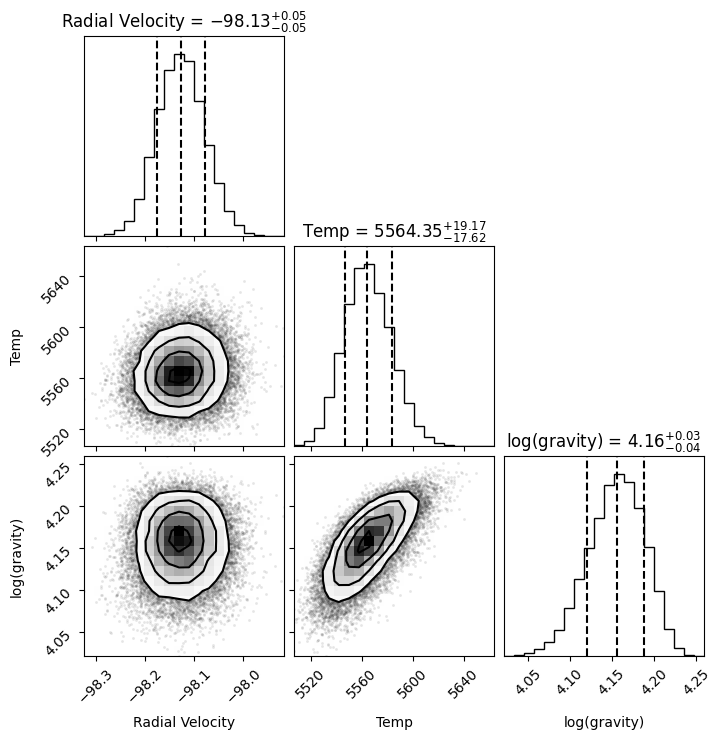

In [10]:
corner_data(file_folder=r'C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X\data', filename='hecto_tp_ds_dp_wide_priors_3_best_guess.fits')
# corner_data(file_folder=r'C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X', filename='demoUTP_multiple_spectra_2.fits')

In [2]:
file_folder=r'C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X\data'    
filename='samples_demo_UTPsmes_V0.fits'
file_folder = os.path.expanduser(file_folder)

datafile = os.path.join(file_folder, filename)

print(datafile)

with fits.open(datafile) as hdu:
    hdu.info()
    print(hdu[0].header)

data_tp_file, header_tp_file = fits.getdata(datafile, header=True)
print(data_tp_file.dtype)

C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X\data\samples_demo_UTPsmes_V0.fits
Filename: C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X\data\samples_demo_UTPsmes_V0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     58   30000R x 25C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  END                                                                                                                                                                                                                                                    

In [5]:
print(np.median(data_tp_file['vrad_0']))

-4.927027244644874


In [4]:
def corner_data_binary(file_folder, filename, tp=True):
    file_folder = os.path.expanduser(file_folder)

    datafile = os.path.join(file_folder, filename)

    print(datafile)

    with fits.open(datafile) as hdu:
        hdu.info()

    data_tp_file, header_tp_file = fits.getdata(datafile, header=True)
    print(data_tp_file.dtype)
    if tp:

        #teff, logg
        data_tp = np.vstack([data_tp_file['Teff_a'], data_tp_file['Teff_b'],
                             data_tp_file['log(g)_a'], data_tp_file['log(g)_b'],
                             data_tp_file['[Fe/H]_a'], data_tp_file['[Fe/H]_b'],
                             data_tp_file['mass_ratio'], data_tp_file['vrad_sys'],
                             data_tp_file['vrad_a'], data_tp_file['vrad_b']]).T
                            #  data_tp_file['[a/Fe]_p'], data_tp_file['[a/Fe]_s'],
                            #  data_tp_file['vstar_p'], data_tp_file['vstar_s'],
                            #  data_tp_file['vmic_p'], data_tp_file['vmic_s']]).T
                            #  data_tp_file['lsf_0'], data_tp_file['pc0_0'],
                            #  data_tp_file['pc1_0'], data_tp_file['pc2_0'],
                            #  data_tp_file['pc3_0'],
                            #  data_tp_file['vrad_0'], data_tp_file['Teff'], data_tp_file['log(g)']]).T
        figure = corner.corner(
                            data_tp,
                            labels = [
                                    r"$T_{eff, a}$",
                                    r"$T_{eff, b}$",
                                    r'$\log{(g)}_a$',
                                    r'$\log{(g)}_b$',
                                    r"$[Fe/H]_a$",
                                    r"$[Fe/H]_b$",
                                    r"$q$",
                                    r"$v_{rad, sys}$",
                                    r"$v_{rad, a}$",
                                    r"$v_{rad, b}$"
                                    # r"$[a/Fe]_a$",
                                    # r"$[a/Fe]_b$",
                                    # r"$v_{star, a}$",
                                    # r"$v_{star, b}$",
                                    # r"$v_{mic, a}$",
                                    # r"$v_{mic, b}$"
                                    ],
                            quantiles=[0.16,0.5,0.84],
                            show_titles=True,
                            title_kwargs={"fontsize": 12},
                        )
    # else:
    #     data_tp = np.vstack([data_tp_file['vrad_1'], data_tp_file['Teff'], data_tp_file['log(g)']]).T
    #     figure = corner.corner(
    #                     data_tp,
    #                     labels = [
    #                             r"$v_{rad}$",
    #                             r"$T_{eff}$",
    #                             r"$\log{(g)}$"
    #                             ],
    #                     quantiles=[0.16,0.5,0.84],
    #                     show_titles=True,
    #                     title_kwargs={"fontsize": 12},
    #                 )

C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X\data\binary_test_007.fits
Filename: C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X\data\binary_test_007.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     62   30000R x 27C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
(numpy.record, [('Av', '>f8'), ('Teff_a', '>f8'), ('Teff_b', '>f8'), ('[Fe/H]_a', '>f8'), ('[Fe/H]_b', '>f8'), ('[a/Fe]_a', '>f8'), ('[a/Fe]_b', '>f8'), ('dist', '>f8'), ('log(R)_a', '>f8'), ('log(R)_b', '>f8'), ('log(g)_a', '>f8'), ('log(g)_b', '>f8'), ('lsf', '>f8'), ('mass_ratio', '>f8'), ('pc0', '>f8'), ('pc1', '>f8'), ('pc2', '>f8'), ('pc3', '>f8'), ('photjitter', '>f8'), ('specjitter', '>f8'), ('vmic_a', '>f8'), ('vmic_b', '>f8'), ('vrad_a', '>f8'), ('vrad_b', '>f8'), ('vrad_sys', '>f8'), ('vstar_a', '>f8'), ('vstar_b', '>f8')])


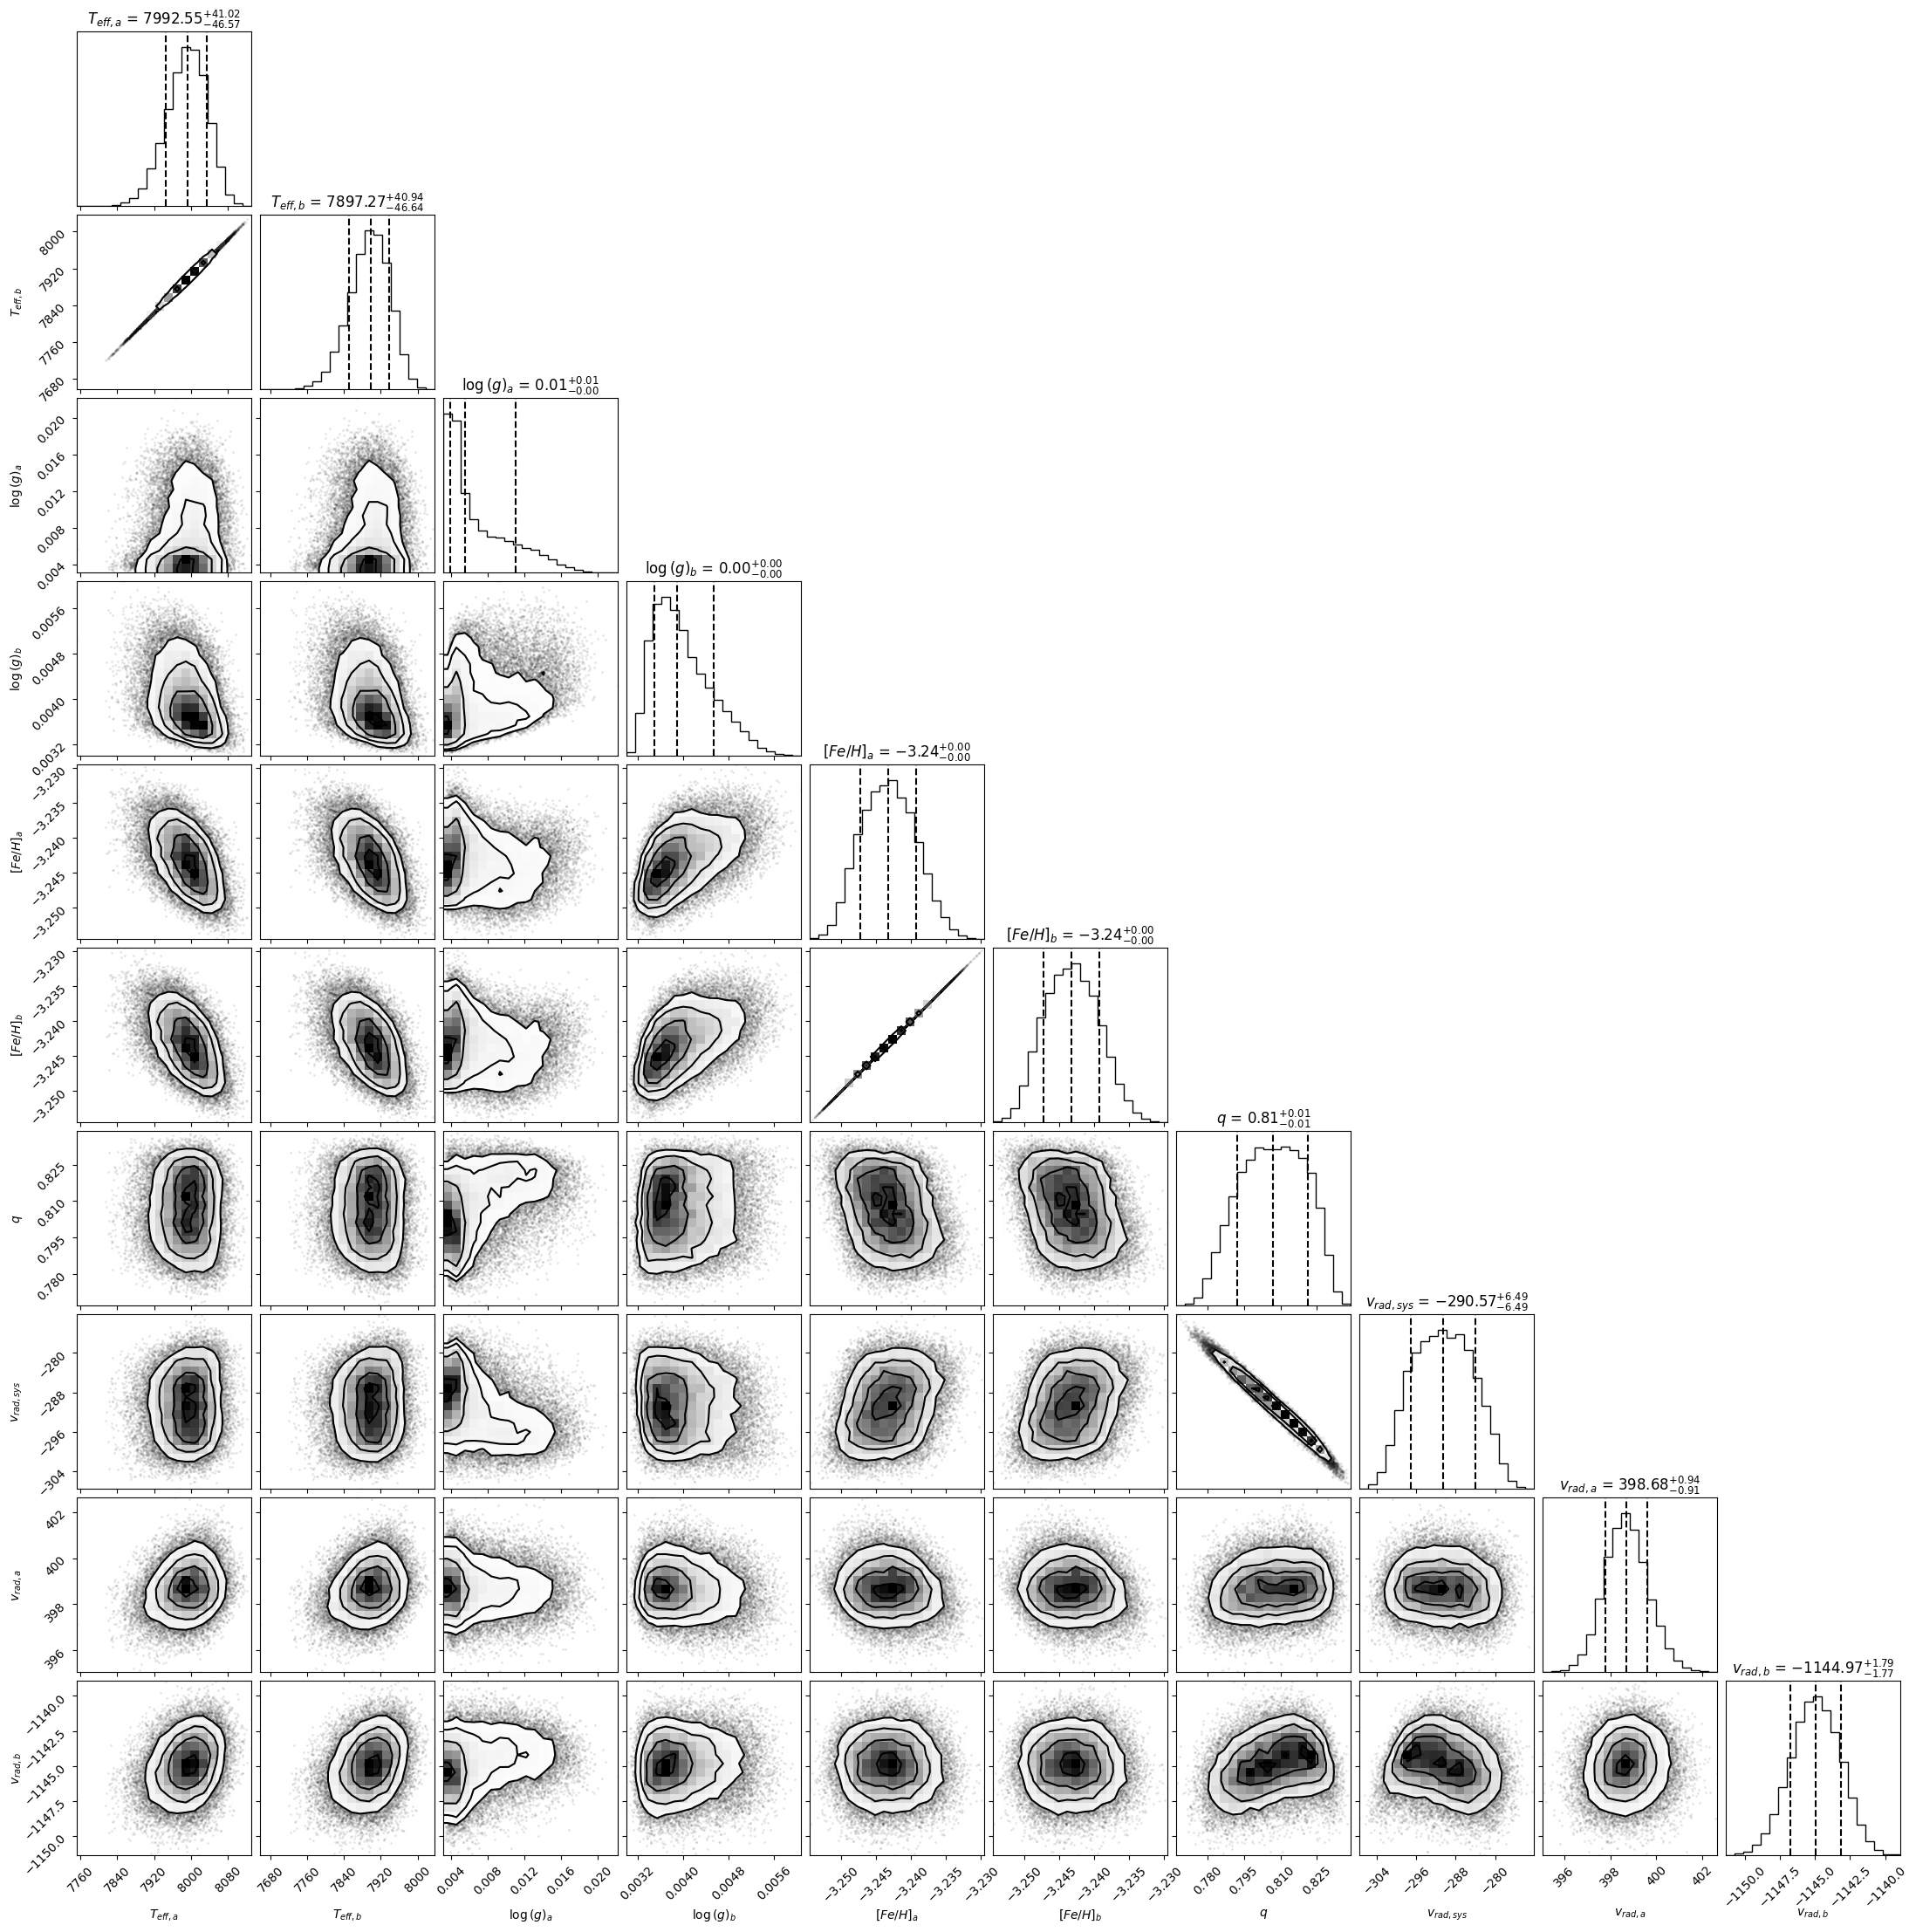

In [5]:
corner_data_binary(file_folder=r'C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X\data', filename='binary_test_007.fits')

In [6]:
def corner_data2(file_folder, filename, tp=True):
    file_folder = os.path.expanduser(file_folder)

    datafile = os.path.join(file_folder, filename)

    print(datafile)

    with fits.open(datafile) as hdu:
        hdu.info()

    data_tp_file, header_tp_file = fits.getdata(datafile, header=True)
    print(data_tp_file.dtype)
    if tp:

        #teff, logg
        data_tp = np.vstack([data_tp_file['[Fe/H]'], data_tp_file['[a/Fe]'],
                             data_tp_file['vstar'], data_tp_file['vmic'],
                             data_tp_file['lsf_0'], data_tp_file['pc0_0'],
                             data_tp_file['pc1_0'], data_tp_file['pc2_0'],
                             data_tp_file['pc3_0'],
                             data_tp_file['vrad_0'], data_tp_file['Teff'], data_tp_file['log(g)']]).T
        figure = corner.corner(
                            data_tp,
                            labels = [
                                    r"[Fe/H]",
                                    r"[a/Fe]",
                                    r"$v_{star}$",
                                    r"$v_{mic}$",
                                    r"LSF",
                                    r"PC0",
                                    r"PC1",
                                    r"PC2",
                                    r"PC3",
                                    r'RV_1',
                                    r'Teff',
                                    r'log(g)'
                                    ],
                            quantiles=[0.16,0.5,0.84],
                            show_titles=True,
                            title_kwargs={"fontsize": 12},
                        )
    else:
        data_tp = np.vstack([data_tp_file['vrad_1'], data_tp_file['Teff'], data_tp_file['log(g)']]).T
        figure = corner.corner(
                        data_tp,
                        labels = [
                                r"$v_{rad}$",
                                r"$T_{eff}$",
                                r"$\log{(g)}$"
                                ],
                        quantiles=[0.16,0.5,0.84],
                        show_titles=True,
                        title_kwargs={"fontsize": 12},
                    )

C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X\data\hectoUTP_multi_2.fits
Filename: C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X\data\hectoUTP_multi_2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     70   30000R x 31C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
(numpy.record, [('Av', '>f8'), ('Teff', '>f8'), ('[Fe/H]', '>f8'), ('[a/Fe]', '>f8'), ('dist', '>f8'), ('log(R)', '>f8'), ('log(g)', '>f8'), ('lsf_0', '>f8'), ('lsf_1', '>f8'), ('lsf_2', '>f8'), ('pc0_0', '>f8'), ('pc0_1', '>f8'), ('pc0_2', '>f8'), ('pc1_0', '>f8'), ('pc1_1', '>f8'), ('pc1_2', '>f8'), ('pc2_0', '>f8'), ('pc2_1', '>f8'), ('pc2_2', '>f8'), ('pc3_0', '>f8'), ('pc3_1', '>f8'), ('pc3_2', '>f8'), ('photjitter', '>f8'), ('specjitter_0', '>f8'), ('specjitter_1', '>f8'), ('specjitter_2', '>f8'), ('vmic', '>f8'), ('vrad_0', '>f8'), ('vrad_1', '>f8'),

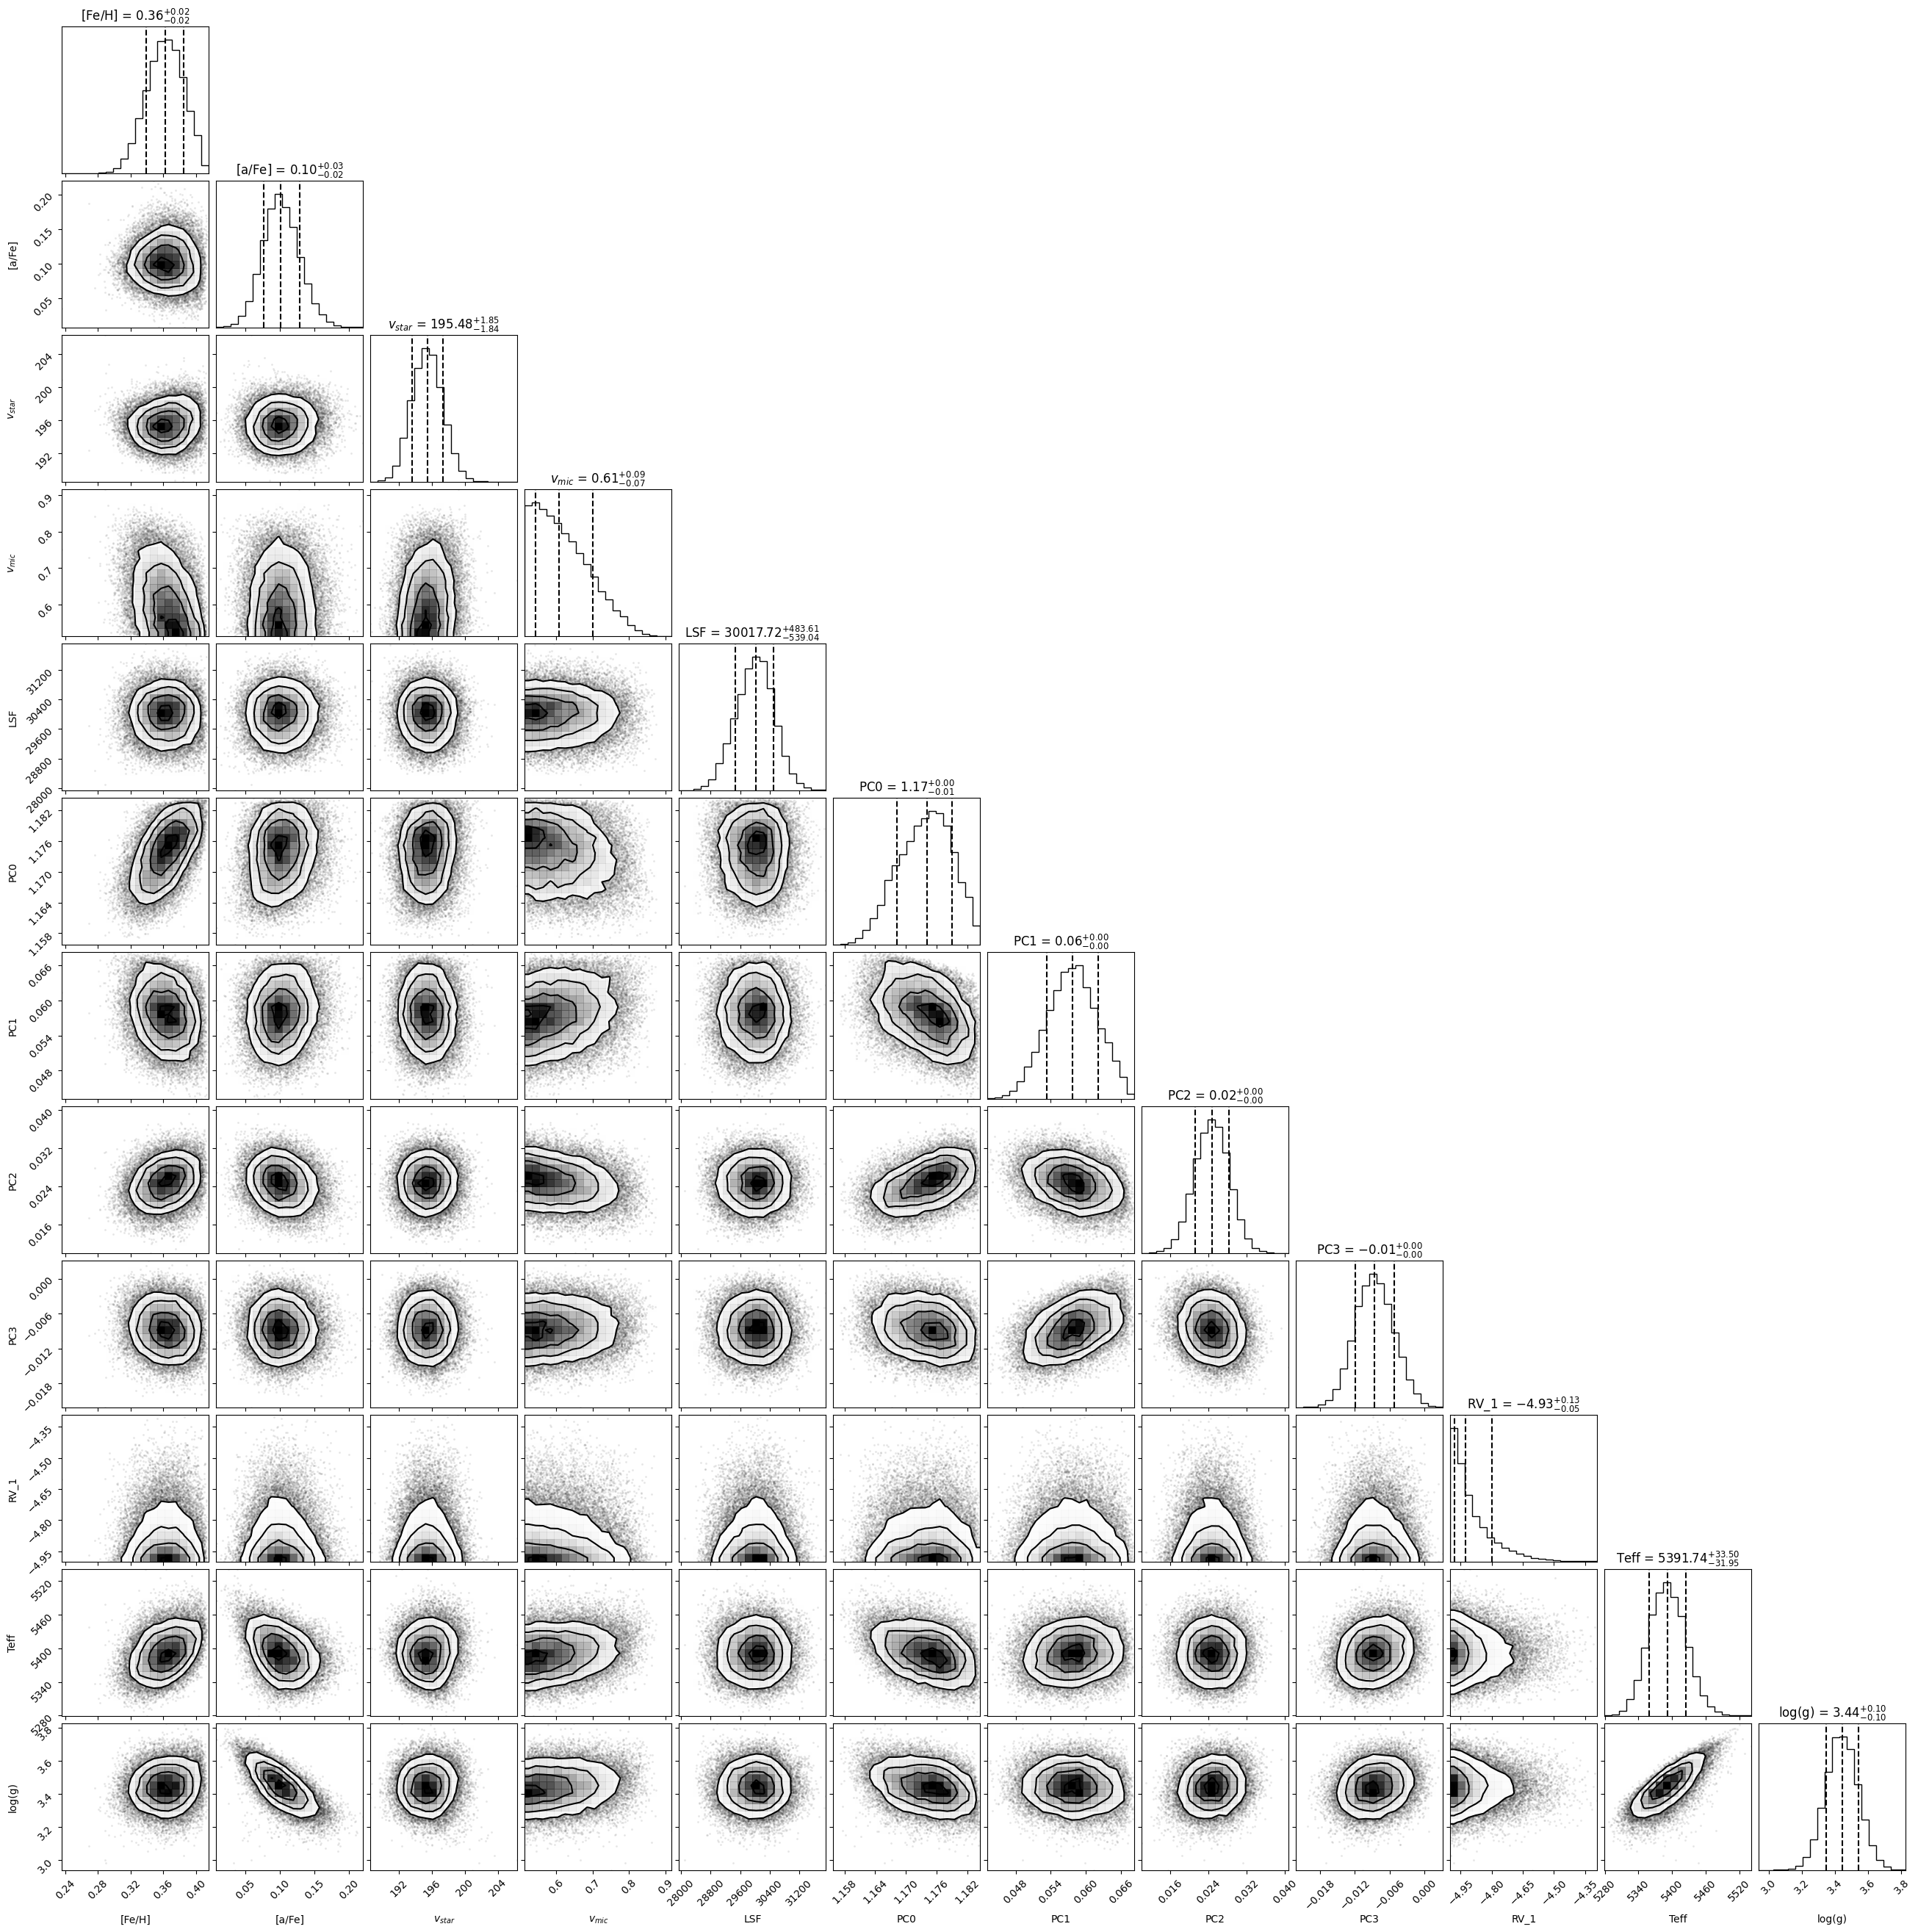

In [8]:
corner_data2(file_folder=r'C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X\data', filename='hectoUTP_multi_2.fits')

In [ ]:
corner_data2(file_folder=r'C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X', filename='hecto_tp_ds_dp_wide_priors_3_best_guess.fits')

C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X\hecto_tp_ds_dp_wide_priors_3_best_guess.fits
Filename: C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X\hecto_tp_ds_dp_wide_priors_3_best_guess.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     42   30000R x 17C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
(numpy.record, [('Av', '>f8'), ('Teff', '>f8'), ('[Fe/H]', '>f8'), ('[a/Fe]', '>f8'), ('dist', '>f8'), ('log(R)', '>f8'), ('log(g)', '>f8'), ('lsf', '>f8'), ('pc0', '>f8'), ('pc1', '>f8'), ('pc2', '>f8'), ('pc3', '>f8'), ('photjitter', '>f8'), ('specjitter', '>f8'), ('vmic', '>f8'), ('vrad', '>f8'), ('vstar', '>f8')])


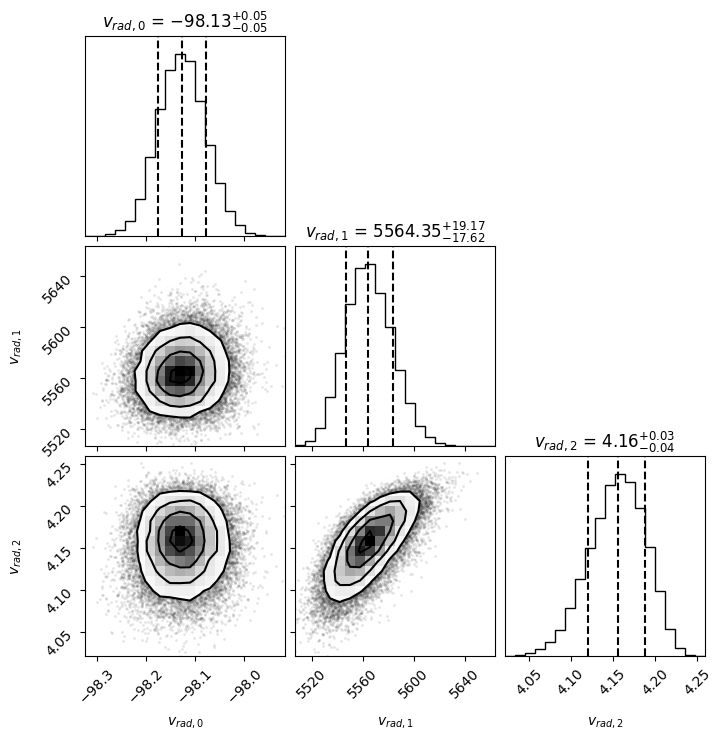

In [7]:
filename3 = "hecto_tp_ds_dp_wide_priors_3_best_guess.fits"
corner_data(file_folder=r'C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X', filename=filename3)

In [11]:
file_folder = os.path.expanduser(r'C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X')
filename1 = "hecto_ds_np.fits"
filename2 = "hecto_tp_ds_dp_improved_priors.fits"
filename3 = "hecto_tp_ds_dp_improved_priors_best_guess.fits"


datafile1 = os.path.join(file_folder, filename1)
datafile2 = os.path.join(file_folder, filename2)
datafile3 = os.path.join(file_folder, filename3)


print(datafile1)
print(datafile2)
print(datafile3)

C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X\hecto_ds_np.fits
C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X\hecto_tp_ds_dp_improved_priors.fits
C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X\hecto_tp_ds_dp_improved_priors_best_guess.fits


In [12]:
with fits.open(datafile3) as hdu:
    hdu.info()

Filename: C:\Users\Jared\Desktop\Laf Plaf\Senior Fall\PHYS 49X\hecto_tp_ds_dp_improved_priors_best_guess.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     42   30000R x 17C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   


In [13]:
data_tp_file1, header_tp_file1 = fits.getdata(datafile1, header=True)

data_tp_file2, header_tp_file2 = fits.getdata(datafile2, header=True)
# header_tp_file2

data_tp_file3, header_tp_file3 = fits.getdata(datafile3, header=True)
header_tp_file3

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  136 / length of dimension 1                          
NAXIS2  =                30000 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   17 / number of table fields                         
TTYPE1  = 'Av      '                                                            
TFORM1  = 'D       '                                                            
TTYPE2  = 'Teff    '                                                            
TFORM2  = 'D       '                                                            
TTYPE3  = '[Fe/H]  '        

In [5]:
data_tp_file2.dtype

dtype((numpy.record, [('Av', '>f8'), ('Teff', '>f8'), ('[Fe/H]', '>f8'), ('[a/Fe]', '>f8'), ('dist', '>f8'), ('log(R)', '>f8'), ('log(g)', '>f8'), ('lsf', '>f8'), ('pc0', '>f8'), ('pc1', '>f8'), ('pc2', '>f8'), ('pc3', '>f8'), ('photjitter', '>f8'), ('specjitter', '>f8'), ('vmic', '>f8'), ('vrad', '>f8'), ('vstar', '>f8')]))

In [6]:
data_tp_file2['[Fe/H]']

array([ 0.034053  ,  0.04177647, -0.07464182, ..., -0.02010139,
       -0.05578766, -0.07574981], dtype='>f8')

In [7]:
data_tp_file2['Teff']

array([5422.58116905, 5403.68883915, 5413.47569541, ..., 5347.42433008,
       5337.02629196, 5366.88233035], dtype='>f8')

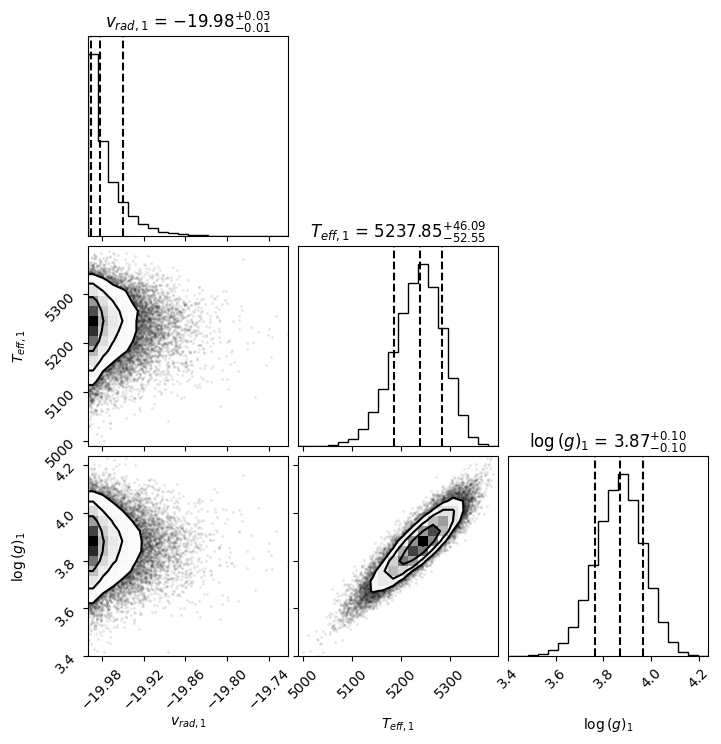

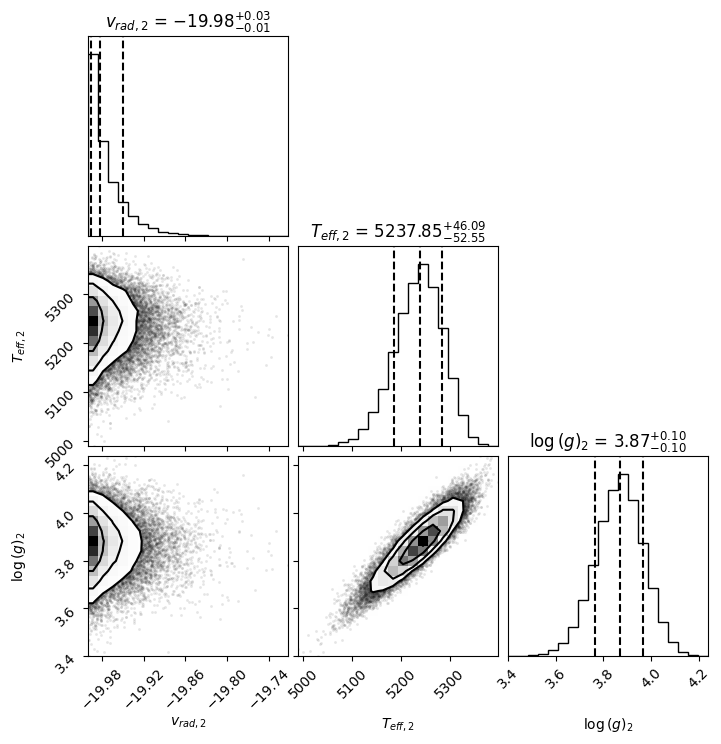

In [ ]:
data_tp1 = np.vstack([data_tp_file1['vrad'], data_tp_file1['Teff'], data_tp_file1['log(g)']]).T
figure = corner.corner(
                        data_tp1,
                        labels = [
                                r"$v_{rad,1}$",
                                r"$T_{eff,1}$",
                                r"$\log{(g)}_1$"
                                ],
                        quantiles=[0.16,0.5,0.84],
                        show_titles=True,
                        title_kwargs={"fontsize": 12},
                    )

data_tp2 = np.vstack([data_tp_file2['vrad'], data_tp_file2['Teff'], data_tp_file2['log(g)']]).T
figure = corner.corner(
                        data_tp1,
                        labels = [
                                r"$v_{rad,2}$",
                                r"$T_{eff,2}$",
                                r"$\log{(g)}_2$"
                                ],
                        quantiles=[0.16,0.5,0.84],
                        show_titles=True,
                        title_kwargs={"fontsize": 12},
                    )

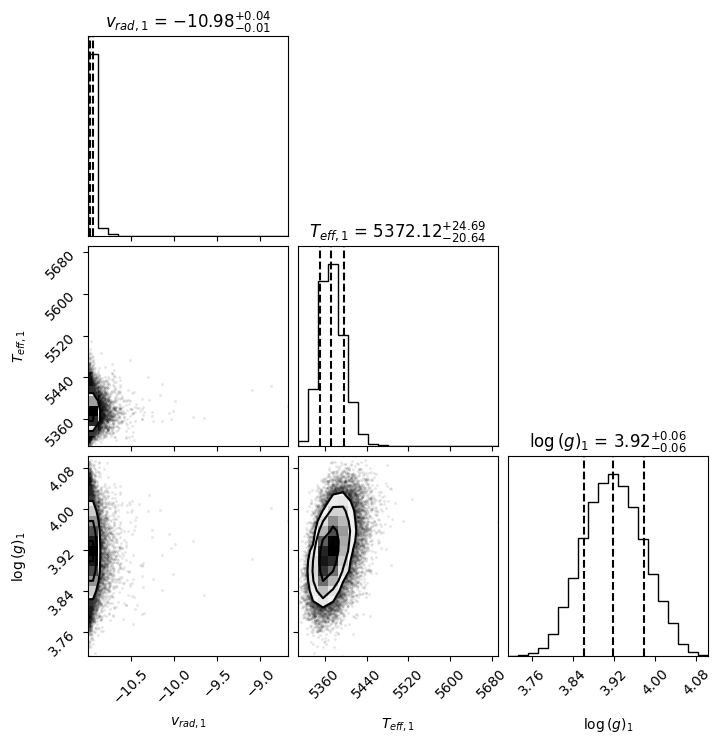

In [14]:
data_tp3 = np.vstack([data_tp_file3['vrad'], data_tp_file3['Teff'], data_tp_file3['log(g)']]).T
figure = corner.corner(
                        data_tp3,
                        labels = [
                                r"$v_{rad,1}$",
                                r"$T_{eff,1}$",
                                r"$\log{(g)}_1$"
                                ],
                        quantiles=[0.16,0.5,0.84],
                        show_titles=True,
                        title_kwargs={"fontsize": 12},
                    )

In [14]:
(np.min(data_tp_file2['vrad']),
np.min(data_tp_file1['vrad']))

(np.float64(-24.999775804810973), np.float64(-19.999759047709645))

In [9]:
data_tp2 = np.vstack([data_tp['[a/Fe]'], data_tp['Teff'], data_tp['[Fe/H]']]).T
figure = corner.corner(
    data_tp2,
    labels = [
        r"[$\alpha$/Fe]",
        r"$T_{eff}$",
        r"[Fe/H]"
    ],
    quantiles=[0.16,0.5,0.84],
    show_titles=True,
    title_kwargs={"fontsize": 12},
)

NameError: name 'data_tp' is not defined

In [37]:
import numpy as np
from scipy.interpolate import interp1d

# Example data for the larger table
wavelength_large = np.linspace(5000, 5200, 200)  # Wavelength from 5000 to 5200 (200 points)
flux_large = np.sin(wavelength_large / 100)      # Example flux data

# Example data for the smaller table
wavelength_small = np.linspace(5100, 5150, 50)  # Wavelength from 5100 to 5150 (50 points)
flux_small = np.cos(wavelength_small / 100)     # Example flux data

# Filter the larger table to the wavelength range of the smaller table
mask = (wavelength_large >= wavelength_small.min()) & (wavelength_large <= wavelength_small.max())
wavelength_large_filtered = wavelength_large[mask]
flux_large_filtered = flux_large[mask]

# Interpolate the larger table's flux to match the wavelengths of the smaller table
interpolator = interp1d(wavelength_large_filtered, flux_large_filtered, kind='linear', fill_value="extrapolate")
flux_large_interpolated = interpolator(wavelength_small)

# Subtract the flux values
flux_difference = flux_small - flux_large_interpolated

# Display the results
print("Wavelengths (Small):", wavelength_small)
print("Flux Difference:", flux_difference)


Wavelengths (Small): [5100.         5101.02040816 5102.04081633 5103.06122449 5104.08163265
 5105.10204082 5106.12244898 5107.14285714 5108.16326531 5109.18367347
 5110.20408163 5111.2244898  5112.24489796 5113.26530612 5114.28571429
 5115.30612245 5116.32653061 5117.34693878 5118.36734694 5119.3877551
 5120.40816327 5121.42857143 5122.44897959 5123.46938776 5124.48979592
 5125.51020408 5126.53061224 5127.55102041 5128.57142857 5129.59183673
 5130.6122449  5131.63265306 5132.65306122 5133.67346939 5134.69387755
 5135.71428571 5136.73469388 5137.75510204 5138.7755102  5139.79591837
 5140.81632653 5141.83673469 5142.85714286 5143.87755102 5144.89795918
 5145.91836735 5146.93877551 5147.95918367 5148.97959184 5150.        ]
Flux Difference: [ 7.18994465e-02  5.75179998e-02  4.30965111e-02  2.86705182e-02
  1.42415226e-02 -1.88973677e-04 -1.46194687e-02 -2.90484604e-02
 -4.34744469e-02 -5.78959265e-02 -7.23113982e-02 -8.67193614e-02
 -1.01118316e-01 -1.15506764e-01 -1.29883207e-01 -1.44246

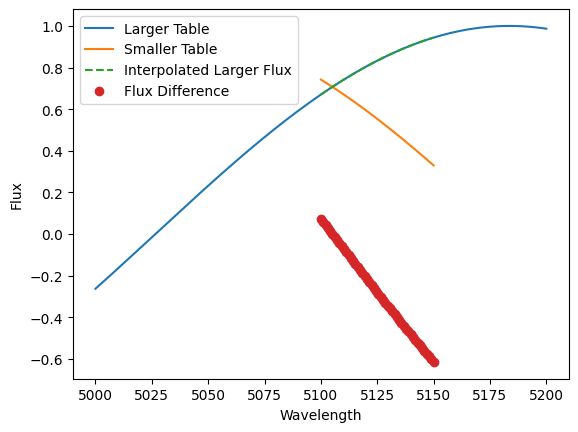

In [38]:
import matplotlib.pyplot as plt

plt.plot(wavelength_large, flux_large, label='Larger Table')
plt.plot(wavelength_small, flux_small, label='Smaller Table')
plt.plot(wavelength_small, flux_large_interpolated, '--', label='Interpolated Larger Flux')
plt.plot(wavelength_small, flux_difference, 'o', label='Flux Difference')
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.legend()
plt.show()
